# CSM QS2020 - Minami
# LAB5 - Percepção Auditiva e Básico de Áudio

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display

<h1> Mascaramento de Frequências

In [2]:
fs = 22050  # Frequência de amostragem
f1 = 4000   # Frequência do sinal 1 em Hz
f2 = 2400   # Frequência do sinal 2 em Hz
tf1 = np.linspace(0, 0.2*fs, num=np.int16(0.2*fs))  # Intervalo de 200ms 
tf2 = np.linspace(0, 0.2*fs, num=np.int16(0.2*fs))
h1 = np.sin(2*np.pi*f1*tf1/fs)  # Sinal Senoidal com f1 = 2kHz, 200ms
h2 = np.sin(2*np.pi*f2*tf2/fs)  # Sinal Senoidal com f2 = 1.2kHz, 200ms


Text(0.5, 1.0, 'Trecho do Sinal 1')

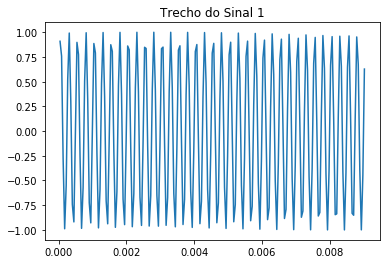

In [3]:
plt.plot(tf1[1:200]/fs,h1[1:200]); plt.title('Trecho do Sinal 1')

Text(0.5, 1.0, 'Sinal 2')

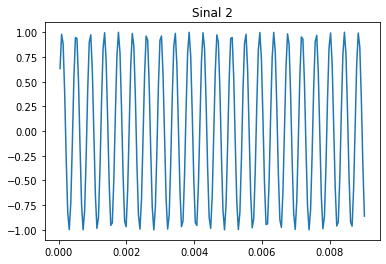

In [4]:
plt.plot(tf2[1:200]/fs, h2[1:200]); plt.title('Sinal 2')

In [5]:
# Ouvindo Sinal 1
IPython.display.Audio(data=h1, rate=fs)

In [6]:
# Ouvindo Sinal 2
IPython.display.Audio(data=h2, rate=fs)

In [7]:
# criando intervalo de silêncio entre os dois sinais
sil = np.zeros((1,2205))  # 100 ms de silêncio

<h2> Sinal com frequência f1 mascarando f2

In [8]:
import time
# Gradiente, fator de 3dB
fat3dB = math.pow(10,0.3)
fat = 1
Nloop = 8
atenuacao = np.linspace(0,-24,num=Nloop+1)
# Atenuando tom com f1 = 1.2kHz, que é o tom a ser mascarado
# intervalo de 5s entre um teste e outro
s1 = np.concatenate( (h1, sil), axis=None)
s2 = np.concatenate( (h2, sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f2,atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


 

1) Atenuação de tom de 2400Hz por 0.0 dB


2) Atenuação de tom de 2400Hz por -3.0 dB


3) Atenuação de tom de 2400Hz por -6.0 dB


4) Atenuação de tom de 2400Hz por -9.0 dB


5) Atenuação de tom de 2400Hz por -12.0 dB


6) Atenuação de tom de 2400Hz por -15.0 dB


7) Atenuação de tom de 2400Hz por -18.0 dB


8) Atenuação de tom de 2400Hz por -21.0 dB


9) Atenuação de tom de 2400Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


<h2> Sinal com frequência f2 mascarando f1

In [9]:
# Invertendo f1 com f2
# Atenuando tom de f2 = 2kHz, que é o tom a ser mascarado 
# Gradiente, fator de 3dB
fat3dB = math.pow(10,0.3)
fat = 1
Nloop = 8
atenuacao = np.linspace(0,-24,num=Nloop+1)
s1 = np.concatenate( (h2, sil), axis=None)
s2 = np.concatenate( (h1, sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f1,atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")

1) Atenuação de tom de 4000Hz por 0.0 dB


2) Atenuação de tom de 4000Hz por -3.0 dB


3) Atenuação de tom de 4000Hz por -6.0 dB


4) Atenuação de tom de 4000Hz por -9.0 dB


5) Atenuação de tom de 4000Hz por -12.0 dB


6) Atenuação de tom de 4000Hz por -15.0 dB


7) Atenuação de tom de 4000Hz por -18.0 dB


8) Atenuação de tom de 4000Hz por -21.0 dB


9) Atenuação de tom de 4000Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


# FIM